In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

%matplotlib inline

sns.set(style="ticks")

In [2]:
Customers = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-3\\Original file\\Customer.csv")

Product_heirarchy = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-3\\Original file\\prod_cat_info.csv")

Transactions = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-3\\Original file\\Transactions.csv")

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
Customer_Final = Transactions.merge(Customers, how = 'left', left_on = 'cust_id', 
                                 right_on = 'customer_Id').merge(Product_heirarchy, how = 'left', 
                                                             left_on = ['prod_cat_code', 'prod_subcat_code'], 
                                                             right_on = ['prod_cat_code', 'prod_sub_cat_code'])

In [4]:
Customer_Final.drop(columns = ['cust_id', 'prod_subcat_code'], inplace = True)

In [5]:
Customer_Final.head()

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,27-02-2014,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,24-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,24-02-2014,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,23-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


### 2. Prepare a summary report for the merged data set.

#####  a. Get the column names and their corresponding data types

In [6]:
Customer_Final.dtypes

transaction_id         int64
tran_date             object
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

##### b. Top/Bottom 10 observations

In [7]:
Customer_Final.head(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,27-02-2014,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,24-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,24-02-2014,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,23-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,23-02-2014,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,22-02-2014,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,22-02-2014,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,22-02-2014,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,21-02-2014,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [8]:
Customer_Final.tail(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,25-01-2011,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,25-01-2011,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,25-01-2011,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,25-01-2011,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,25-01-2011,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,25-01-2011,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,25-01-2011,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,25-01-2011,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,25-01-2011,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,25-01-2011,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [9]:
five_point_summary = Customer_Final.describe().T.iloc[4 : 8, 3 : ].rename(columns = {'25%' : 'Q1', 
                                                                                     '50%' : 'median', '75%' : 'Q3'})

In [10]:
five_point_summary

,min,Q1,median,Q3,max
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5
customer_Id,266783.000,268935.00,270980.00,273114.000,275265.0
city_code,1.000,3.00,5.00,8.000,10.0


##### d. Frequency tables for all the categorical variables 

In [11]:
Freq_Gender = Customer_Final.Gender.value_counts()

Freq_Gender

M    11811
F    11233
Name: Gender, dtype: int64

In [12]:
Freq_city_code = Customer_Final.city_code.value_counts()

Freq_city_code

4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64

In [13]:
Freq_prod_cat_code = Customer_Final.prod_cat_code.value_counts()

Freq_prod_cat_code

5    6069
3    4898
6    4129
2    2999
1    2960
4    1998
Name: prod_cat_code, dtype: int64

In [14]:
Freq_Store_type = Customer_Final.Store_type.value_counts()

Freq_Store_type

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [15]:
Freq_prod_sub_cat_code = Customer_Final.prod_sub_cat_code.value_counts()

Freq_prod_sub_cat_code

4     4002
3     3067
10    2993
1     2950
11    2058
12    2029
7     1043
2     1007
6      989
9      985
8      972
5      958
Name: prod_sub_cat_code, dtype: int64

In [16]:
Freq_prod_cat = Customer_Final.prod_cat.value_counts()

Freq_prod_cat

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [17]:
Freq_prod_subcat = Customer_Final.prod_subcat.value_counts()

Freq_prod_subcat

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

###### Histograms for continuous variables

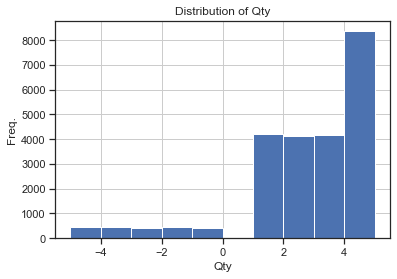

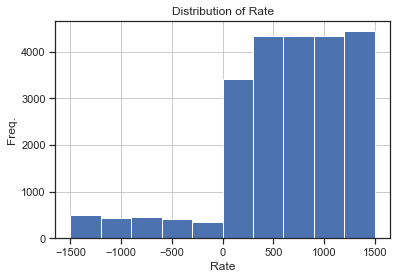

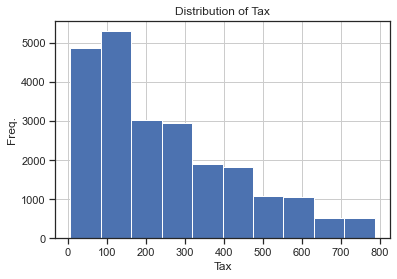

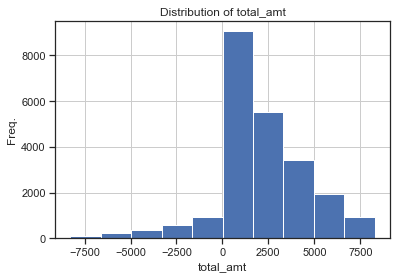

Qty          None
Rate         None
Tax          None
total_amt    None
dtype: object

In [18]:
Continuous_Variables = ['Qty', 'Rate', 'Tax', 'total_amt']

def cont_var_hist(x):
    
    plt.title("Distribution of " + x.name)
    
    plt.xlabel(x.name)
    plt.ylabel('Freq.')
    
    x.hist()
    
    plt.show()
    
Customer_Final[Continuous_Variables].apply(cont_var_hist)

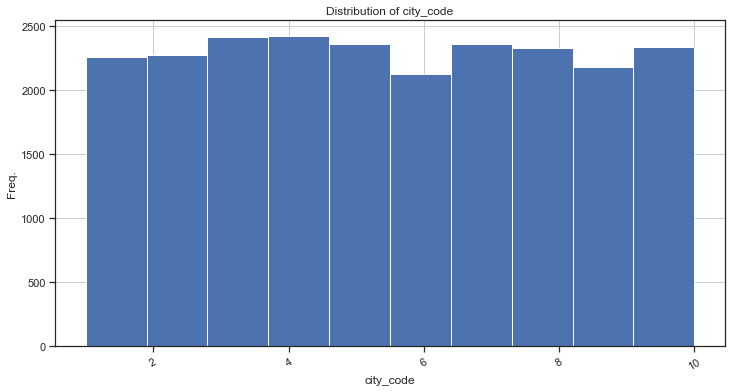

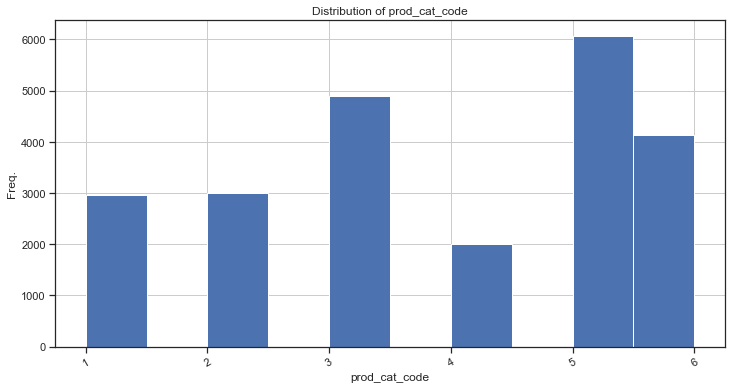

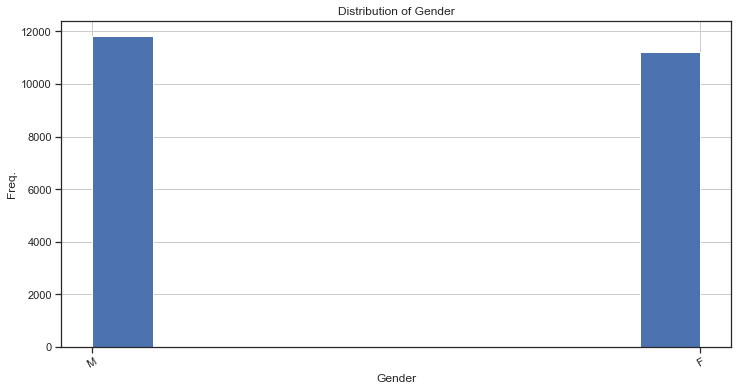

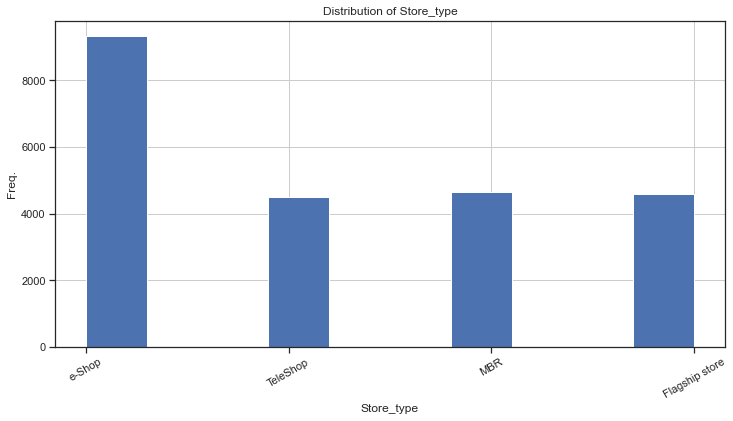

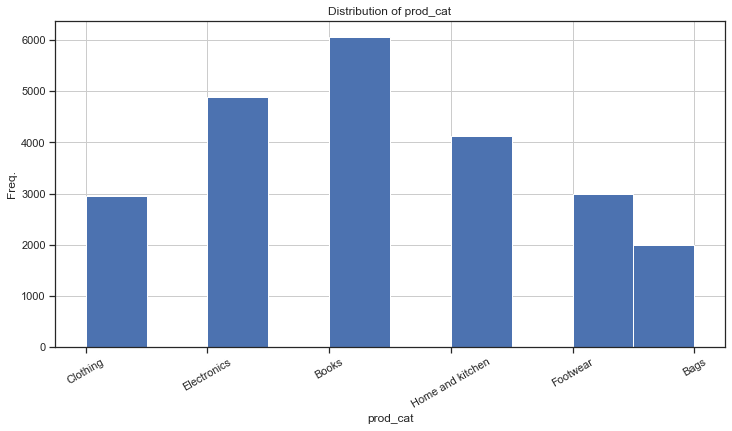

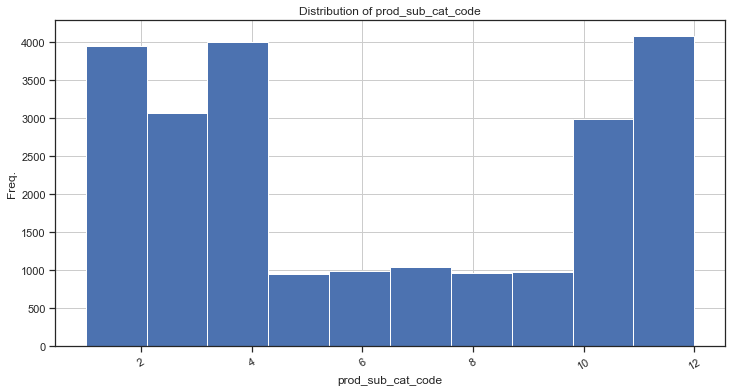

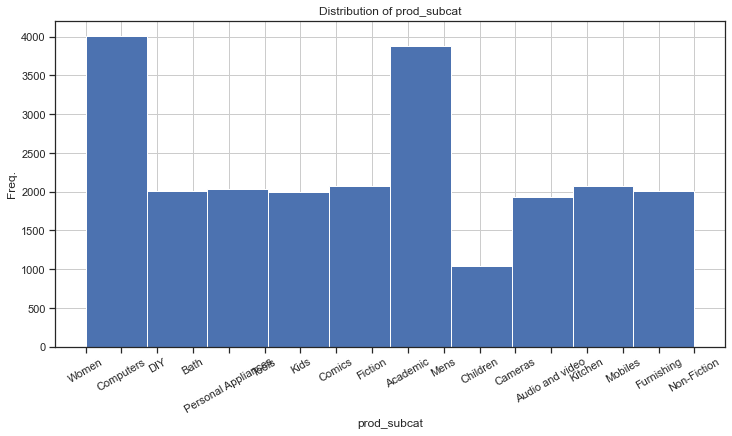

city_code            None
prod_cat_code        None
Gender               None
Store_type           None
prod_cat             None
prod_sub_cat_code    None
prod_subcat          None
dtype: object

In [19]:
Categorical_Variables = ['city_code', 'prod_cat_code', 'Gender', 'Store_type', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat']

def cat_var_hist(x):
    
    plt.figure(figsize = (12, 6))
    
    plt.xticks(rotation = 30)
    plt.title("Distribution of " + x.name)
    
    plt.xlabel(x.name)
    plt.ylabel('Freq.')
    
    x.hist()
    
    plt.show()
    
Customer_Final[Categorical_Variables].apply(cat_var_hist)

### 4. Calculate the following information using the merged dataset : 

##### a. Time period of the available transaction data 

In [20]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final.DOB, format = '%d-%m-%Y')

In [21]:
max_tran_date = Customer_Final.DOB.max().strftime('%d-%m-%Y')
min_tran_date = Customer_Final.DOB.min().strftime('%d-%m-%Y')

In [22]:
print(min_tran_date, "to", max_tran_date)

02-01-1970 to 29-12-1992


##### b. Count of transactions where the total amount of transaction was negative

In [23]:
Customer_Final[Customer_Final.total_amt < 0].shape[0]

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [24]:
gender_wise_prod_sales = pd.crosstab(index = Customer_Final.prod_cat, columns = Customer_Final.Gender, 
                                     values = Customer_Final.Qty, aggfunc = 'sum')

In [25]:
prod_cat_popular_among_females = pd.DataFrame(gender_wise_prod_sales.loc[ : : , 'F']).sort_values(by = 'F', ascending = False)

In [26]:
prod_cat_popular_among_males = pd.DataFrame(gender_wise_prod_sales.loc[ : : , 'M']).sort_values(by = 'M', ascending = False)

In [27]:
prod_cat_popular_among_females

,F
prod_cat,
Books,7070
Electronics,5832
Home and kitchen,4895
Footwear,3716
Clothing,3425
Bags,2362


In [28]:
print("Product categories popular among females are ", list(prod_cat_popular_among_females.index) )

Product categories popular among females are  ['Books', 'Electronics', 'Home and kitchen', 'Footwear', 'Clothing', 'Bags']


In [29]:
prod_cat_popular_among_males

,M
prod_cat,
Books,7587
Electronics,6476
Home and kitchen,5041
Clothing,3748
Footwear,3555
Bags,2346


In [30]:
print("Product categories popular among males are ", list(prod_cat_popular_among_males.index) )

Product categories popular among males are  ['Books', 'Electronics', 'Home and kitchen', 'Clothing', 'Footwear', 'Bags']


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [31]:
city_code_wise_customers = pd.DataFrame(Customer_Final.groupby('city_code')['customer_Id'].count())

In [32]:
city_code_wise_customers['percentage_of_customers'] = city_code_wise_customers/city_code_wise_customers.sum()*100

city_code_wise_customers.rename(columns = {'customer_Id' : 'customer_count'}, inplace = True)

In [33]:
city_code_wise_customers.sort_values(by = 'customer_count', ascending = False).head(1)

,customer_count,percentage_of_customers
city_code,,
4.0,2422,10.509872


#### City code 4.0 has the maximum customers(2422) and the percentage of customers from that city is 10.50%.

### 7. Which store type sells the maximum products by value and by quantity? 

In [34]:
store_type_wise_sales = Customer_Final.groupby('Store_type')[['Qty', 'total_amt']].sum()

In [35]:
store_type_wise_sales.sort_values(by = ['Qty', 'total_amt'], ascending = False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


#### e-Shop sells the maximum products by value(19824816.05) and by quantity(22763).

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [38]:
store_type_wise_prod_sales = pd.crosstab(index = Customer_Final.Store_type, columns = Customer_Final.prod_cat, 
                                         values = Customer_Final.total_amt, aggfunc = 'sum')

In [39]:
store_type_wise_prod_sales.loc['Flagship store', ['Electronics', 'Clothing']].sum()

3409559.2700000005

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [40]:
gender_wise_prod_sales = pd.crosstab(index = Customer_Final.prod_cat, columns = Customer_Final.Gender, 
                                     values = Customer_Final.total_amt, aggfunc = 'sum')

In [41]:
gender_wise_prod_sales.loc['Electronics', 'M']

5703109.42500002

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [46]:
cust_final_without_negative_amt = Customer_Final[Customer_Final.total_amt > 0]

In [47]:
cust_final_with_unique_values = cust_final_without_negative_amt.groupby(['customer_Id', 'prod_cat_code', 'prod_sub_cat_code', 
                                                                           'total_amt'])['transaction_id'].count().reset_index()

In [48]:
cust_final_with_unique_values = cust_final_with_unique_values.groupby('customer_Id')['transaction_id'].count()

In [49]:
cust_final_with_unique_values[cust_final_with_unique_values > 10].count()

6

#### 6 customers have more than 10 unique transactions.

### 11. For all customers aged between 25 - 35, find out:
 

##### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [50]:
Customer_Final['Age'] = (dt.datetime.now() - Customer_Final.DOB)/np.timedelta64(1, 'Y')

In [51]:
cust_age_between_25_and_35 = Customer_Final[Customer_Final.Age.between(25, 35)]

In [52]:
pd.DataFrame(cust_age_between_25_and_35.groupby('prod_cat')['total_amt'].sum()).loc[['Electronics', 'Books']].sum()

total_amt    4407762.125
dtype: float64

#### Total amount spent for “Electronics” and “Books” product categories by all customers aged between 25 - 35 is 4407762.125.

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
 

In [53]:
cust_age_between_25_and_35['tran_date'] = pd.to_datetime(cust_age_between_25_and_35.tran_date)

<ipython-input-53-05f4a1881265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_age_between_25_and_35['tran_date'] = pd.to_datetime(cust_age_between_25_and_35.tran_date)


In [54]:
cust_tran_between_jan_mar = cust_age_between_25_and_35[cust_age_between_25_and_35.tran_date.between('2014-01-01', '2014-03-01')]

In [55]:
cust_tran_between_jan_mar.total_amt.sum()

354358.02999999997

#### Total amount spent by all customers aged 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014 is 354358.02999999997.